# Exploratory Data Analysis

In this notebook, we will explore the data and try to find some insights for preparing the data for our goal-conditioned model.

The framework we will use is [robomimi](https://robomimic.github.io/) which is a framework for simulating robotic tasks. It is built on top of [mujoco](http://www.mujoco.org/) a physics engine for simulating robotic tasks. 



In [1]:
# imports
import os
import robomimic.utils.file_utils as FileUtils
import robomimic.utils.obs_utils as ObsUtils
import helper
import h5py
import numpy as np

# change this to the path of the project
%cd /project
%load_ext autoreload
%autoreload 2

/project


In [2]:
# Project directory structure
ROOT_DIR = os.getcwd()
WS_DIR = os.path.join(ROOT_DIR, "src/")
DATA_DIR = os.path.join(ROOT_DIR, "data/")
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Downloading the data
There are 5 different tasks with proficient human demonstrations. The tasks we will explore from these 5 tasks are:
- Lift, a task where the robot has to lift a box from the table.
- Can, a task where the robot has to take a can from one place to the desired place.

In [3]:
## download the dataset
# user parameters
task_1 = "lift"
task_2 = "can"
dataset_type = "ph"
hdf5_type = "low_dim"

# download the dataset
lift_data_path = helper.download_dataset(task_1, dataset_type, hdf5_type, DATA_DIR+task_1)
can_data_path = helper.download_dataset(task_2, dataset_type, hdf5_type, DATA_DIR+task_2)

In [4]:
!python3 /robomimic/robomimic/scripts/get_dataset_info.py --dataset {lift_data_path}


total transitions: 9666
total trajectories: 200
traj length mean: 48.33
traj length std: 6.116461395284041
traj length min: 36
traj length max: 64
action min: -1.0
action max: 1.0

==== Filter Keys ====
filter key 20_percent with 40 demos
filter key 20_percent_train with 36 demos
filter key 20_percent_valid with 4 demos
filter key 50_percent with 100 demos
filter key 50_percent_train with 90 demos
filter key 50_percent_valid with 10 demos
filter key train with 180 demos
filter key valid with 20 demos

==== Env Meta ====
{
    "env_name": "Lift",
    "env_version": "1.4.1",
    "type": 1,
    "env_kwargs": {
        "has_renderer": false,
        "has_offscreen_renderer": false,
        "ignore_done": true,
        "use_object_obs": true,
        "use_camera_obs": false,
        "control_freq": 20,
        "controller_configs": {
            "type": "OSC_POSE",
            "input_max": 1,
            "input_min": -1,
            "output_max": [
                0.05,
                0.0

## Exploring the data
### Task: Lift

In [37]:
with h5py.File(lift_data_path, 'r') as hdf5_file:
    states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=0)

Extracting Trajectory 0:
    - Actions: (59, 7)
    - States: (59, 19)
    - Goal State: (19,)


In [41]:
states[0]

array([-0.09049418, -0.01522947,  1.01184797,  0.99722759, -0.00723282,
        0.0740351 ,  0.00190572,  0.020833  , -0.020833  ,  0.02644941,
        0.02698126,  0.83142407,  0.        ,  0.        ,  0.96910941,
        0.2466312 , -0.11694359, -0.04221072,  0.18042389])

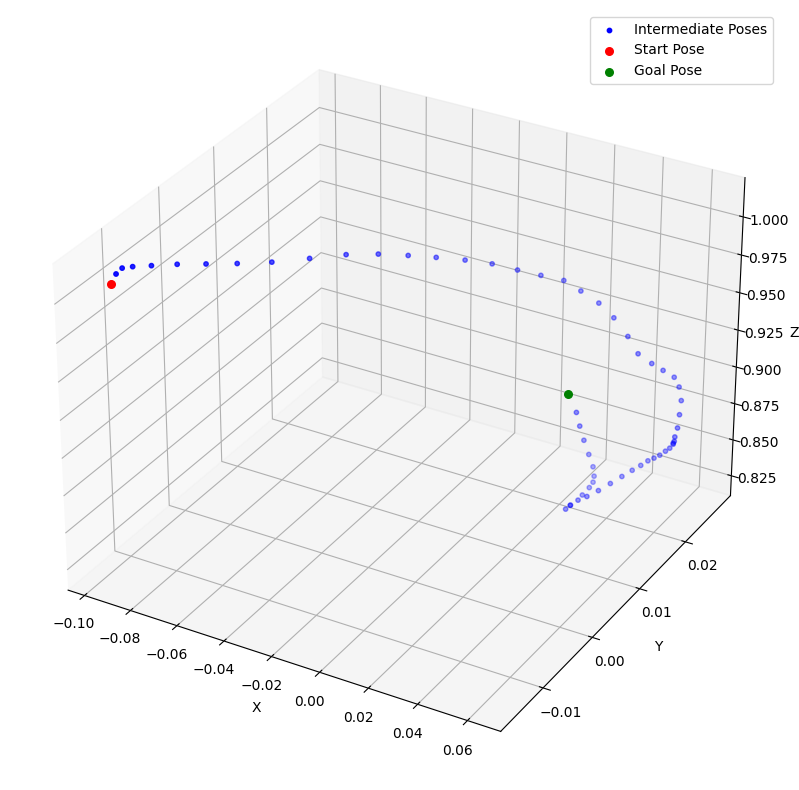

In [38]:
end_eff_pos = states[:, :3]
end_eff_goal_pos = goal_state[:3]
helper.plot_end_effector_trajectory(end_eff_pos, end_eff_goal_pos)

### Task: Can

In [35]:
with h5py.File(can_data_path, 'r') as hdf5_file:
    states, goal_state, actions = helper.extract_trajectory_i(hdf5_file, trajectory_idx=0)

Extracting Trajectory 0:
    - Actions: (118, 7)
    - States: (118, 23)
    - Goal State: (23,)


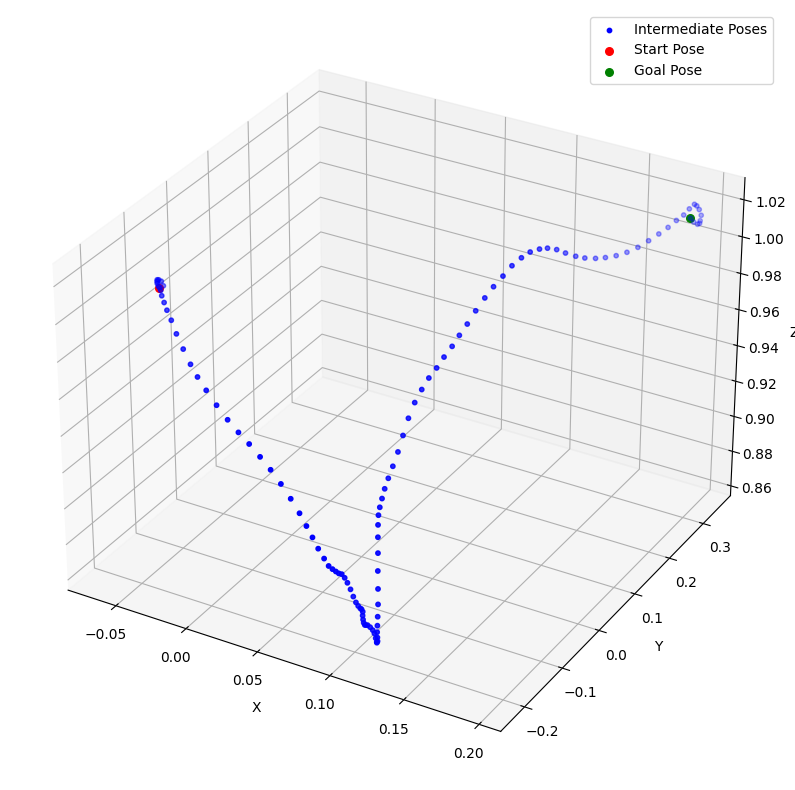

In [36]:
end_eff_pos = states[:, :3]
end_eff_goal_pos = goal_state[:3]
helper.plot_end_effector_trajectory(end_eff_pos, end_eff_goal_pos)

## Structure of the whole data

In [10]:

def print_structure(hdf5_object, indent=0):
    """
    Recursively prints the structure of an HDF5 file or group.

    Args:
        hdf5_object: h5py.File or h5py.Group object
        indent (int): current indentation level for pretty printing
    """
    space_indentation = '    ' * indent
    keys = list(hdf5_object.keys())

    for key in keys:
        print(f"{space_indentation}{key}")
        if isinstance(hdf5_object[key], h5py.Group):
            print_structure(hdf5_object[key], indent + 1)
        elif isinstance(hdf5_object[key], h5py.Dataset):
            # For datasets, you might want to print additional info (e.g., shape, dtype)
            print(f"{space_indentation}    - Shape: {hdf5_object[key].shape}, Type: {hdf5_object[key].dtype}")

# Load the dataset
with h5py.File(can_data_path, 'r') as hdf5_file:
    print_structure(hdf5_file)


data
    demo_0
        actions
            - Shape: (118, 7), Type: float64
        dones
            - Shape: (118,), Type: int64
        next_obs
            object
                - Shape: (118, 14), Type: float64
            robot0_eef_pos
                - Shape: (118, 3), Type: float64
            robot0_eef_quat
                - Shape: (118, 4), Type: float64
            robot0_eef_vel_ang
                - Shape: (118, 3), Type: float64
            robot0_eef_vel_lin
                - Shape: (118, 3), Type: float64
            robot0_gripper_qpos
                - Shape: (118, 2), Type: float64
            robot0_gripper_qvel
                - Shape: (118, 2), Type: float64
            robot0_joint_pos
                - Shape: (118, 7), Type: float64
            robot0_joint_pos_cos
                - Shape: (118, 7), Type: float64
            robot0_joint_pos_sin
                - Shape: (118, 7), Type: float64
            robot0_joint_vel
                - Shape: (118, 7), T